# LINEAR REGRESSION WITH PYTHON SCIKIT LEARN

In this notebook, we will implement simple linear regression on a dataset of two variables. We will use python and scikit-learn library.


# Simple Linear Regression

Regression analysis is the method of using observations (data records) to quantify the relationship between a target variable (a field in the record set), also referred to as a dependent variable, and a set of independent variables, also referred to as a covariate.

In this regression task, we will predict the percentage of marks that a student is expected to score on the basis of number of hours they studied.

Author: Akshit Gupta

**IMPORT LIBRARIES**

In [112]:
#import the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline

**IMPORT DATASET**

In [113]:
#import dataset
data = pd.read_csv("http://bit.ly/w-data")

In [114]:
#imported data
print("Data: ")
data

Data: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**PLOT GRAPH TO DEDUCE RELATIONSHIP**

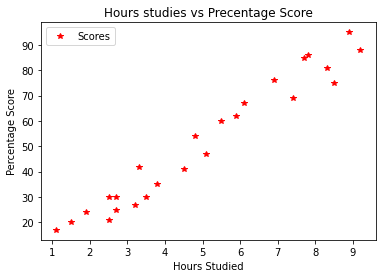

In [115]:
#Plotting the distribution of scores
data.plot(x="Hours", y = "Scores", style = '*', color = 'red')
plt.title("Hours studies vs Precentage Score")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()

**From the graph, we can clearly say that there is a positive linear relation between the number of hours and percentage score**

**PREPARING DATA**

In [116]:
#selecting input and output data
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values

In [117]:
#input data
print("input data: ")
X

input data: 


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [118]:
#output data
print("Output data: ")
y

Output data: 


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Now that we have input and output data, the next step is to split this data into training set and test set.

In [159]:
#split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

**TRAINING THE ALGORITHM**

Now its finally time to train our model

In [160]:
#Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("training done!")

training done!


No handles with labels found to put in legend.


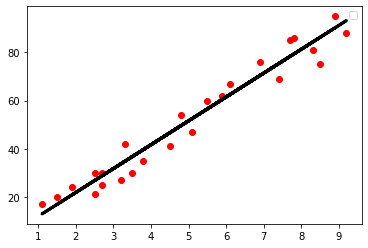

In [161]:
#Plot the regression line
reg_line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y, color = 'red' )
plt.plot(X,reg_line, linewidth=3, color = 'black')
plt.legend()
plt.show()

** MAKING PREDICTIONS **

It's time to make some predicitons.



In [162]:
#print test data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [163]:
#predictions
y_pred  = regressor.predict(X_test)

In [164]:
#print predictions
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual and predicted values

In [165]:
#Compare Actual and Predicted data
data_frame = pd.DataFrame({'Actual_Value': y_test, 'Predicted_Value': y_pred})
data_frame

,Actual_Value,Predicted_Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**EVALUATING THE MODEL**

Calculate mean square error to evaluate performance of algorithm


In [166]:
#evaluate the model
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  4.183859899002982
